In [1]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sign-language-digits-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F7836%2F11071%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240403%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240403T085425Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D66f7ac405bacc75adcbb94b5975e026b029e2a7dae38db6e36f7cd6c1b843495c2e193a009dc2a91868fcff4261e7486fee5d6747e50269410439b7df8278981f39c58cb21952e2da79e575a5e239901293318b7922801901a8222fb2e66a5cd45845aead4f71ba96eb43d312588c2d08ff135fd59986ce1e58984ae6d88bd2223c5a2273a3e0ffd0ec3c2757f74cc97b901e397c37ec4cb5712e1164d768b1089dec92e179ec3494cb922b0143f89c07bbbaced2907e595ef501962e0ab553b8b267087b029bb5235762992867a10d89409cbc3287560b9d8da0c0d5773a7aef221e19c323f7163942a06ea6fd92dd81196ebdd3afde2e083153c8f36ff8fb8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 17623806 bytes downloaded
Downloaded and uncompressed: sign-language-digits-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


In [3]:
x_data = np.load("/kaggle/input/sign-language-digits-dataset/X.npy")
y_data = np.load("/kaggle/input/sign-language-digits-dataset/Y.npy")

In [4]:
x_data[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

In [5]:
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

I visualize an image inside of x_data.

(-0.5, 63.5, 63.5, -0.5)

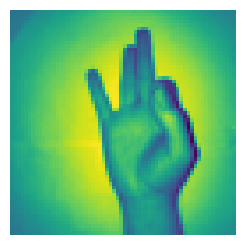

In [6]:
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_data[45].reshape(img_size, img_size))
plt.axis("off")

In [7]:
X_train = x_data.reshape(-1,64,64,1)
print("x_train shape: ", X_train.shape)

x_train shape:  (2062, 64, 64, 1)


In this chapter, I classify them according to the number of pictures in the data set.
- 204-409 => 0
- 822-1028 => 1
- 1649-1855 => 2
- 1443-1649 => 3
- 1236-1443 => 4
- 1855-2062 => 5
- 615-822 => 6
- 409-615 => 7
- 1028-1236 => 8
- 0-204 => 9

In [8]:
X_classification = np.concatenate((X_train[204:409,:],
                                   X_train[822:1028,:],
                                   X_train[1649:1855,:],
                                   X_train[1443:1649,:],
                                   X_train[1236:1443,:],
                                   X_train[1855:2062,:],
                                   X_train[615:822,:],
                                   X_train[409:615,:],
                                   X_train[1028:1236,:],
                                   X_train[0:204,:]),axis = 0)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_classification, y_data, test_size = 0.1, random_state = 42)

print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (1855, 64, 64, 1)
x_test shape (207, 64, 64, 1)
y_train shape (1855, 10)
y_test shape (207, 10)


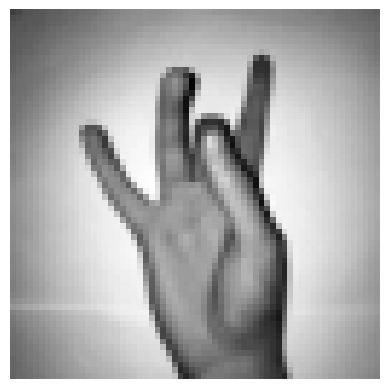

In [10]:
plt.imshow(x_train[2][:,:,0], cmap = "gray")
plt.axis("off")
plt.show()

In [11]:
# import Library
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Create Model
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Define Optimizer
optimizer = Adam(learning_rate = 0.0001, beta_1=0.9, beta_2=0.999)

# Compile Model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

# Epochs And Batch Size
epochs = 100

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [13]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train), epochs = epochs, validation_data = (x_test, y_test))

Epoch 1/100
58/58 [==============================] - 29s 392ms/step - loss: 2.3086 - accuracy: 0.0997 - val_loss: 2.3020 - val_accuracy: 0.1304
Epoch 2/100
58/58 [==============================] - 11s 185ms/step - loss: 2.3036 - accuracy: 0.1089 - val_loss: 2.3041 - val_accuracy: 0.1014
Epoch 3/100
58/58 [==============================] - 15s 252ms/step - loss: 2.3035 - accuracy: 0.1024 - val_loss: 2.3031 - val_accuracy: 0.0966
Epoch 4/100
58/58 [==============================] - 19s 313ms/step - loss: 2.3028 - accuracy: 0.1035 - val_loss: 2.3044 - val_accuracy: 0.0966
Epoch 5/100
58/58 [==============================] - 17s 283ms/step - loss: 2.3017 - accuracy: 0.1024 - val_loss: 2.3036 - val_accuracy: 0.1546
Epoch 6/100
58/58 [==============================] - 19s 329ms/step - loss: 2.3012 - accuracy: 0.1067 - val_loss: 2.3025 - val_accuracy: 0.0725
Epoch 7/100
58/58 [==============================] - 12s 202ms/step - loss: 2.2996 - accuracy: 0.1170 - val_loss: 2.3031 - val_accuracy:

In [ ]:
plt.plot(history.history["val_loss"], color = "b", label = "Validation Loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# confusion matrix
# Predict the value from the validation dataset
Y_pred = model.predict(x_test)
# Convert Predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert Validation observation to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# Compute the confision matrix
condision_mtrx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(condision_mtrx, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = ".2f", ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
x_val_test =  x_test.reshape(x_test.shape[0], 64, 64)

fig , axis = plt.subplots(4, 4, figsize = (12, 14))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_val_test[i], cmap = 'binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {Y_pred[i].argmax()}");

In [ ]:
y_pred_test = model.predict(x_test)
y_pred_test = np.argmax(y_pred_test,axis=1)

i = 0
plt.imshow(x_test[i].reshape(64,64), cmap = plt.cm.binary)
plt.axis("off")
plt.show()
print('Previsto : {}'.format(y_pred_test))

result = pd.Series(y_pred_test, name = "Label")
submission = pd.concat([pd.Series(range(1, len(y_pred_test)+1), name = "ImageId"), result], axis = 1)
print(submission.head(10))
submission.to_csv("mlp_mnist_v1.csv", index = False)

****
